In [1]:
from matplotlib import pyplot as plt

from data import generate_A, generate_b
from algorithms import jacobi_method, gauss_seidel_method

# Zadanie A

In [2]:
MATRIX_DIMENTIONS = (939, 939)


In [3]:
A = generate_A(MATRIX_DIMENTIONS, 12, 1, 1)
b = generate_b(MATRIX_DIMENTIONS[0])

# Zadanie B


In [4]:
x_jacobi, iterations_jacobi, error_jacobi = jacobi_method(A, b)

In [5]:
print("Iterations: ", iterations_jacobi)


Iterations:  20


In [6]:
x_gauss, iterations_gauss, error_gauss = gauss_seidel_method(A, b)

Iterations:  12


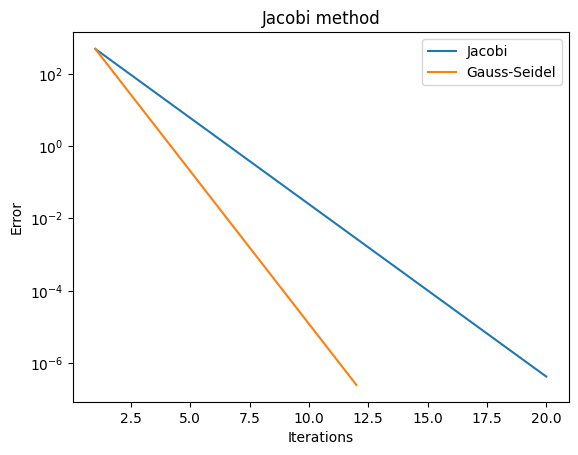

In [7]:
print("Iterations: ", iterations_gauss)
plt.plot(range(1, iterations_jacobi + 1), error_jacobi)
plt.plot(range(1, iterations_gauss + 1), error_gauss)

plt.title("Jacobi method")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.yscale("log")
plt.legend(["Jacobi", "Gauss-Seidel"])
plt.show()

# Zadanie C

In [8]:
A = generate_A(MATRIX_DIMENTIONS, 3, -1, -1)
b = generate_b(MATRIX_DIMENTIONS[0])

In [9]:
x_jacobi, iterations_jacobi, error_jacobi = jacobi_method(A, b)

In [10]:
x_gauss, iterations_gauss, error_gauss = gauss_seidel_method(A, b)

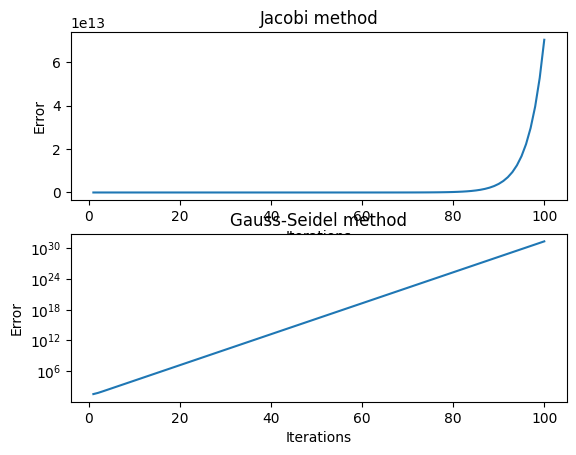

In [11]:
plt.subplot(2, 1, 1)
plt.plot(range(1, iterations_jacobi + 1), error_jacobi)
plt.title("Jacobi method")
plt.xlabel("Iterations")
plt.ylabel("Error")

plt.subplot(2, 1, 2)
plt.plot(range(1, iterations_gauss + 1), error_gauss)
plt.title("Gauss-Seidel method")
plt.xlabel("Iterations")
plt.ylabel("Error")

plt.yscale("log")
plt.show()